# Mobile Price Classification
## classify mobile price range
About Dataset
Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, f1_score, multilabel_confusion_matrix
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")

In [56]:
# path = "..."

In [57]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Description columns:
- battery_power Total energy a battery can store in one time measured in mAh
- blue Has bluetooth or not
- clock_speed speed at which microprocessor executes instructions
- dual_sim Has dual sim support or not
- fc Front Camera mega pixels
- four_g Has 4G or not
- int_memory Internal Memory in Gigabytes
- m_dep Mobile Depth in cm
- mobile_wt Weight of mobile phone
- n_cores Number of cores of processor
- pc Primary Camera mega pixels
- px_height Pixel Resolution Height
- px_width Pixel Resolution Width
- ram Random Access Memory in Mega Bytes
- sc_h Screen Height of mobile in cm
- sc_w Screen Width of mobile in cm
- talk_time longest time that a single battery charge will last when you are
- three_g Has 3G or not
- touch_screen Has touch screen or not
- wifi Has wifi or not

In [58]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [59]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [60]:
test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [62]:
### In data have not missing values. Feature have only int and float values.

In [63]:
# Let us look difference between columns in data and test datasets.

In [64]:
set(data.columns) - set(test.columns)

{'price_range'}

In [65]:
set(test.columns) - set(data.columns)

{'id'}

# Classification and split columns on bin, categorical and numerical columns

In [66]:
val = list(data.columns)
for l in val:
    print(data[l].value_counts())
    print('__________________________')

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64
__________________________
0    1010
1     990
Name: blue, dtype: int64
__________________________
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
__________________________
1    1019
0     981
Name: dual_sim, dtype: int64
__________________________
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
__________________________
1    1043
0     957
Name: four_g, dtype: int64
_________________________

In [67]:
bin_cols = ['dual_sim', 'blue', 'four_g', 'three_g', 'touch_screen', 'wifi', ]
num_cols = ['battery_power', 'mobile_wt', 'int_memory', 'px_height', 'px_width', 'ram']
cat_cols = ['clock_speed', 'fc', 'm_dep', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']
target = ['price_range']

In [68]:
data[bin_cols].nunique()

dual_sim        2
blue            2
four_g          2
three_g         2
touch_screen    2
wifi            2
dtype: int64

In [69]:
data[num_cols].nunique()

battery_power    1094
mobile_wt         121
int_memory         63
px_height        1137
px_width         1109
ram              1562
dtype: int64

In [70]:
data[cat_cols].nunique()

clock_speed    26
fc             20
m_dep          10
n_cores         8
pc             21
sc_h           15
sc_w           19
talk_time      19
dtype: int64

In [71]:
data.shape[1], (len(bin_cols) + len(num_cols) + len(cat_cols) + len(target))

(21, 21)

# Feature importance: Mutual information

In [72]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, data['price_range'])

In [73]:
mi = data[cat_cols + num_cols + bin_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

ram              1.281758
battery_power    0.900118
px_height        0.899476
px_width         0.881043
mobile_wt        0.104475
int_memory       0.054841
sc_w             0.021212
pc               0.016541
fc               0.016524
clock_speed      0.016449
sc_h             0.011130
talk_time        0.009478
m_dep            0.007276
n_cores          0.005141
touch_screen     0.000970
four_g           0.000795
blue             0.000358
three_g          0.000343
dual_sim         0.000322
wifi             0.000214
dtype: float64

Let's look at wifi

In [74]:
mutual_info_score(data['wifi'], data['price_range'])

0.00021410774846983283

In [75]:
wi_fi_0 = data[data.wifi == 0].price_range.mean()
wi_fi_0

1.4787018255578093

In [76]:
wi_fi_1 = data[data.wifi == 1].price_range.mean()
wi_fi_1

1.5207100591715976

In [77]:
global_price = data.price_range.mean()
global_price

1.5

### We do not see a big difference in the impact on target, but we don't have so many speakers anymore, let's all leave them.

# Correlation matrix

<AxesSubplot:>

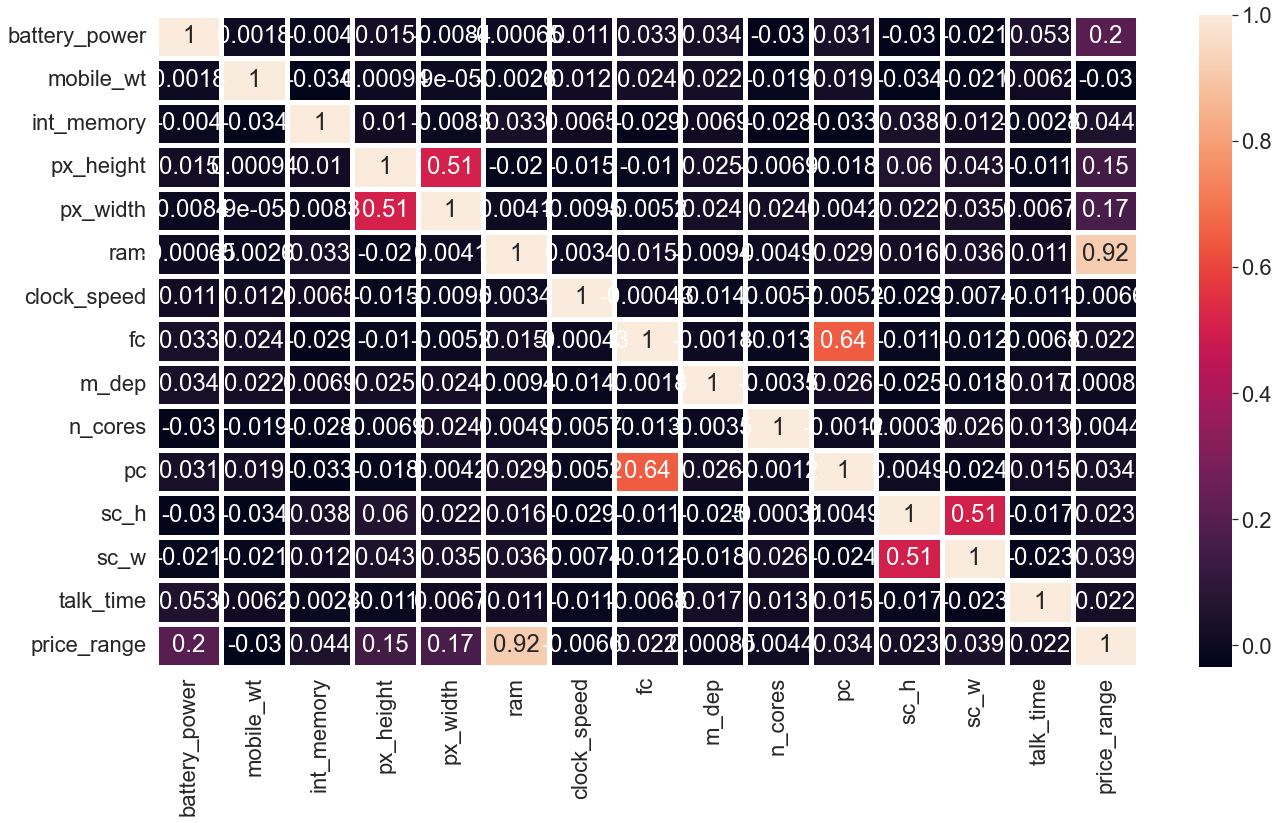

In [78]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(data[num_cols + cat_cols + target].corr(), annot=True, linewidths=5, ax=ax)

# One-hot encoding

In [79]:
df_train, df_val, y_train, y_val = train_test_split(data[cat_cols + num_cols + bin_cols],
                                                    data['price_range'], test_size=0.2, random_state=1)


In [80]:
df_train.shape, df_val.shape

((1600, 20), (400, 20))

# Prepare

In [81]:
def prepare_data(df_train, df_val, test):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    test_dict = test.to_dict(orient='records')
    X_test = dv.transform(test_dict)
    return dv, X_train, X_val, X_test

In [82]:
dv, X_train, X_val, X_test = prepare_data(df_train, df_val, test)

In [83]:
model = LogisticRegression(solver='lbfgs', random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [84]:
y_pred = model.predict(X_val)
m_c_m = multilabel_confusion_matrix(y_val, y_pred)
m_c_m

array([[[292,  16],
        [ 21,  71]],

       [[258,  46],
        [ 44,  52]],

       [[240,  54],
        [ 62,  44]],

       [[256,  38],
        [ 27,  79]]], dtype=int64)

In [85]:
labels = model.classes_

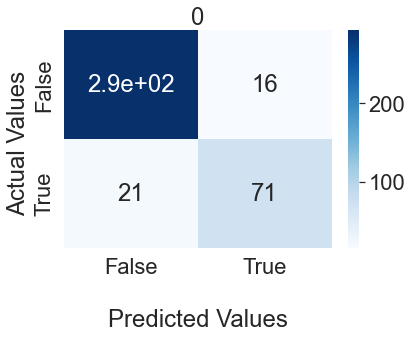

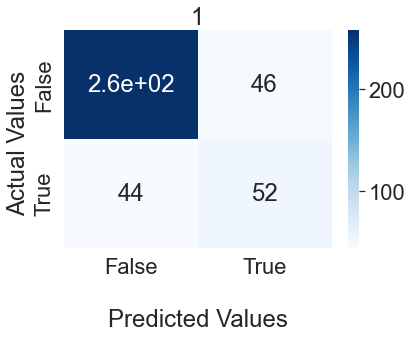

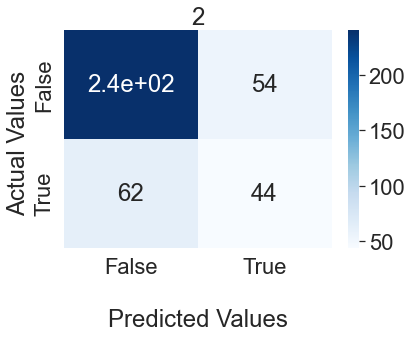

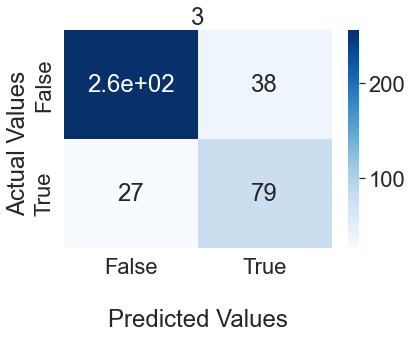

In [86]:
for l, m in zip(labels, m_c_m.tolist()):
    ax = sns.heatmap(m, annot=True, cmap='Blues')

    ax.set_title(l);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [87]:
print(metrics.classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        87
           1       0.54      0.53      0.54        98
           2       0.42      0.45      0.43        98
           3       0.75      0.68      0.71       117

    accuracy                           0.61       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.61      0.62       400



### Let's create a function to plot multimartix.

In [88]:
def plot_muli_cmatrix(y_val, y_pred, model=model):
    m_c_m = multilabel_confusion_matrix(y_val, y_pred)
    labels = model.classes_
    for l, m in zip(labels, m_c_m.tolist()):
        ax = sns.heatmap(m, annot=True, cmap='Blues')

        ax.set_title(l);
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False', 'True'])
        ax.yaxis.set_ticklabels(['False', 'True'])

        ## Display the visualization of the Confusion Matrix.
        plt.show()

# Catbooost

In [89]:
dv, X_train, X_val, X_test = prepare_data(df_train, df_val, test)

In [90]:
from catboost import CatBoostClassifier

tunned_model = CatBoostClassifier(
    random_seed=42,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)

tunned_model.fit(
    X_train, y_train,
    verbose=False,
    eval_set=(X_val, y_val),
    plot=True

)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [91]:
y_pred = tunned_model.predict(X_val)
m_c_m = multilabel_confusion_matrix(y_val, y_pred)

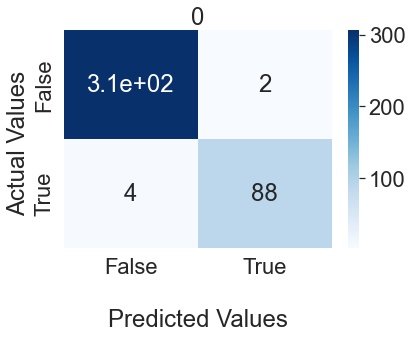

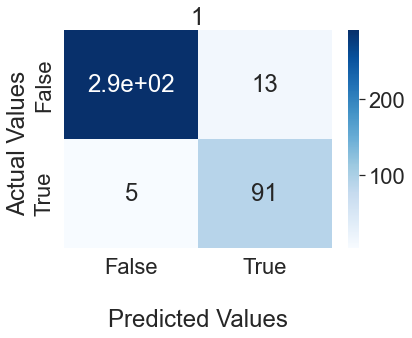

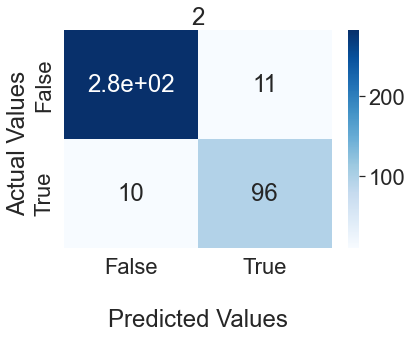

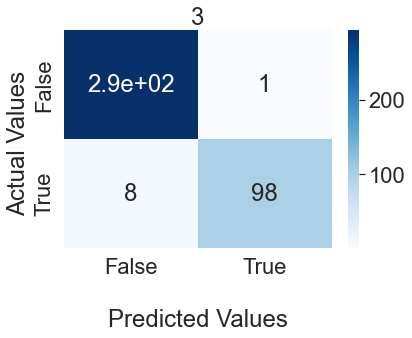

In [92]:
plot_muli_cmatrix(y_val, y_pred, model=tunned_model)

In [93]:
print(metrics.classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.95      0.88      0.91       104
           2       0.91      0.90      0.90       107
           3       0.92      0.99      0.96        99

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



We got the best metrics

In [94]:
X = np.vstack([X_train, X_val])
X_train.shape, X_val.shape, X.shape

((1600, 20), (400, 20), (2000, 20))

In [95]:
y = np.hstack([y_train, y_val])
y.shape

(2000,)

In [96]:
y.shape

(2000,)

In [97]:
best_model = CatBoostClassifier(
    random_seed=42,
    iterations=int(tunned_model.tree_count_ * 1.2)
)

best_model.fit(
    X, y,
    verbose=100
)

Learning rate set to 0.07027
0:	learn: 1.2729863	total: 21.8ms	remaining: 26.1s
100:	learn: 0.2053783	total: 1.03s	remaining: 11.2s
200:	learn: 0.1181517	total: 1.96s	remaining: 9.75s
300:	learn: 0.0867067	total: 2.71s	remaining: 8.1s
400:	learn: 0.0669843	total: 3.54s	remaining: 7.05s
500:	learn: 0.0529804	total: 4.29s	remaining: 5.99s
600:	learn: 0.0430583	total: 5.07s	remaining: 5.06s
700:	learn: 0.0354672	total: 5.84s	remaining: 4.16s
800:	learn: 0.0299757	total: 6.62s	remaining: 3.3s
900:	learn: 0.0257431	total: 7.56s	remaining: 2.51s
1000:	learn: 0.0223895	total: 8.56s	remaining: 1.7s
1100:	learn: 0.0197754	total: 9.59s	remaining: 862ms
1199:	learn: 0.0175596	total: 10.6s	remaining: 0us


In [98]:
y_pred = best_model.predict(X_test)

# Save the best_model

In [99]:
import pickle

In [100]:
outpyt_file = f'best_model.bin'
outpyt_file

'best_model.bin'

In [101]:
with open(outpyt_file, 'wb') as f_out:
    pickle.dump((dv, best_model), f_out)


In [102]:
import pickle

In [ ]:
input_file = 'model_C=1.0.bin'
with open(input_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [106]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(random_state=42))

In [136]:
# customer = test.iloc[0].drop('id').to_dict()
customer = {'battery_power': 1043.0,
            'blue': 1.0,
            'clock_speed': 1.8,
            'dual_sim': 1.0,
            'fc': 14.0,
            'four_g': 0.0,
            'int_memory': 5.0,
            'm_dep': 0.1,
            'mobile_wt': 193.0,
            'n_cores': 3.0,
            'pc': 16.0,
            'px_height': 226.0,
            'px_width': 1412.0,
            'ram': 3476.0,
            'sc_h': 12.0,
            'sc_w': 7.0,
            'talk_time': 2.0,
            'three_g': 0.0,
            'touch_screen': 1.0,
            'wifi': 0.0}

In [132]:
X = dv.transform(customer)
X

array([[1.043e+03, 1.000e+00, 1.800e+00, 1.000e+00, 1.400e+01, 0.000e+00,
        5.000e+00, 1.000e-01, 1.930e+02, 3.000e+00, 1.600e+01, 2.260e+02,
        1.412e+03, 3.476e+03, 1.200e+01, 7.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00]])

In [147]:
int(model.predict(X)[0])

2

In [149]:
float(round(max(model.predict_proba(X)[0]), 2))

0.63